In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("sonar")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [3]:
data.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
V6       float64
V7       float64
V8       float64
V9       float64
V10      float64
V11      float64
V12      float64
V13      float64
V14      float64
V15      float64
V16      float64
V17      float64
V18      float64
V19      float64
V20      float64
V21      float64
V22      float64
V23      float64
V24      float64
V25      float64
V26      float64
V27      float64
V28      float64
V29      float64
V30      float64
          ...   
V32      float64
V33      float64
V34      float64
V35      float64
V36      float64
V37      float64
V38      float64
V39      float64
V40      float64
V41      float64
V42      float64
V43      float64
V44      float64
V45      float64
V46      float64
V47      float64
V48      float64
V49      float64
V50      float64
V51      float64
V52      float64
V53      float64
V54      float64
V55      float64
V56      float64
V57      float64
V58      float64
V59      float

In [4]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [5]:
data.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
        ..
V32      0
V33      0
V34      0
V35      0
V36      0
V37      0
V38      0
V39      0
V40      0
V41      0
V42      0
V43      0
V44      0
V45      0
V46      0
V47      0
V48      0
V49      0
V50      0
V51      0
V52      0
V53      0
V54      0
V55      0
V56      0
V57      0
V58      0
V59      0
V60      0
Class    0
Length: 61, dtype: int64

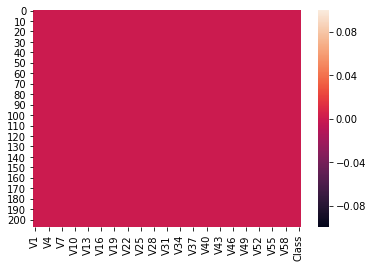

In [6]:
sns.heatmap(data.isnull())

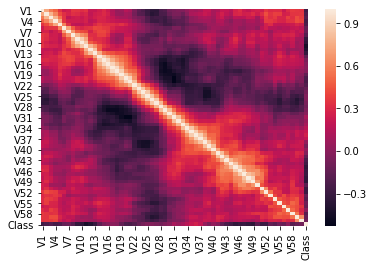

In [7]:
sns.heatmap(data.corr())

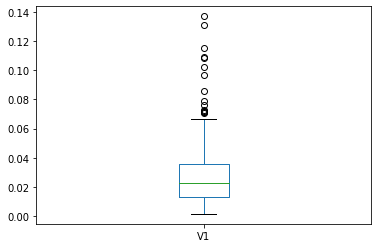

In [8]:
#Checking the outliers
data['V1'].plot.box()

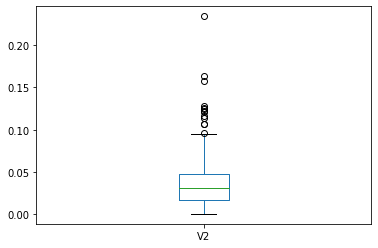

In [9]:
data['V2'].plot.box()

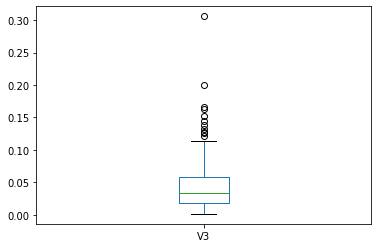

In [10]:
data['V3'].plot.box()

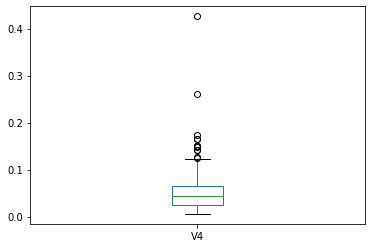

In [11]:
data['V4'].plot.box()

In [12]:
#Removing the Outliers
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z

array([[0.39955135, 0.04064823, 0.02692565, ..., 0.17167808, 0.65894689,
        1.06973356],
       [0.70353822, 0.42163039, 1.05561832, ..., 0.44455424, 0.41985233,
        1.06973356],
       [0.12922901, 0.60106749, 1.72340448, ..., 0.25276128, 0.25758223,
        1.06973356],
       ...,
       [1.00438083, 0.16007801, 0.67384349, ..., 0.03913824, 0.67887143,
        0.93481221],
       [0.04953255, 0.09539176, 0.13480381, ..., 0.70402047, 0.34015415,
        0.93481221],
       [0.13794908, 0.06497869, 0.78861924, ..., 0.29860448, 0.99479044,
        0.93481221]])

In [13]:
df=data[(z<3).all(axis=1)]
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,1
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,1
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,1
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,1
10,0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,...,0.0062,0.0120,0.0052,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036,1
11,0.0123,0.0309,0.0169,0.0313,0.0358,0.0102,0.0182,0.0579,0.1122,0.0835,...,0.0133,0.0265,0.0224,0.0074,0.0118,0.0026,0.0092,0.0009,0.0044,1
12,0.0079,0.0086,0.0055,0.0250,0.0344,0.0546,0.0528,0.0958,0.1009,0.1240,...,0.0176,0.0127,0.0088,0.0098,0.0019,0.0059,0.0058,0.0059,0.0032,1


In [14]:
print(data.shape)
print(df.shape)

(208, 61)
(168, 61)


In [15]:
#checking skewness of data
df.skew()

V1       1.260141
V2       1.305137
V3       1.651471
V4       1.237233
V5       0.921870
V6       0.863454
V7       0.346430
V8       0.945236
V9       0.956368
V10      0.763364
V11      0.758853
V12      0.477091
V13      0.690740
V14      0.721121
V15      0.716783
V16      0.783513
V17      0.675321
V18      0.549661
V19      0.251887
V20     -0.082001
V21     -0.280993
V22     -0.503579
V23     -0.631948
V24     -0.676276
V25     -1.062888
V26     -1.046461
V27     -0.955375
V28     -0.862214
V29     -0.576772
V30     -0.128444
           ...   
V32      0.346410
V33      0.548229
V34      0.687875
V35      0.802276
V36      0.792208
V37      0.808269
V38      0.896261
V39      0.678321
V40      0.719920
V41      0.921628
V42      0.684853
V43      0.675759
V44      1.221813
V45      1.473023
V46      0.991893
V47      1.126371
V48      0.873927
V49      0.929468
V50      0.913654
V51      0.765023
V52      1.254590
V53      0.909089
V54      0.843380
V55      1.281404
V56      0

In [16]:
#treating the skewness
df=np.sqrt(df)

In [17]:
df.skew()

V1       0.372090
V2       0.281334
V3       0.482336
V4       0.263262
V5       0.190869
V6       0.058182
V7      -0.391304
V8      -0.072021
V9       0.164431
V10     -0.024306
V11      0.091532
V12     -0.143750
V13      0.012747
V14      0.049090
V15      0.042767
V16      0.318747
V17      0.281597
V18      0.219088
V19     -0.146461
V20     -0.497068
V21     -0.744176
V22     -0.979181
V23     -1.146056
V24     -1.208589
V25     -1.753113
V26     -1.469745
V27     -1.554572
V28     -1.508263
V29     -1.229499
V30     -0.664048
           ...   
V32     -0.196577
V33     -0.000900
V34      0.090209
V35      0.252099
V36      0.202090
V37      0.224796
V38      0.277811
V39      0.155282
V40     -0.028574
V41      0.201612
V42     -0.120035
V43     -0.230328
V44      0.344360
V45      0.479419
V46      0.100931
V47      0.189477
V48     -0.080463
V49      0.101095
V50      0.021241
V51     -0.104436
V52      0.385572
V53      0.243354
V54      0.158895
V55      0.467552
V56      0

#Splitting the data into x and y

In [18]:
x=df.drop("Class",axis=1)
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,0.141421,0.192614,0.206882,0.143875,0.308869,0.314006,0.392301,0.400125,0.557584,0.459456,...,0.152315,0.051962,0.080623,0.126095,0.084853,0.129228,0.134164,0.091652,0.094868,0.056569
1,0.212838,0.228692,0.290345,0.262488,0.343948,0.508232,0.464327,0.590000,0.577668,0.535910,...,0.111803,0.091652,0.094340,0.069282,0.096954,0.138203,0.118322,0.070000,0.072111,0.066332
4,0.276043,0.258070,0.219317,0.198494,0.242899,0.254755,0.347707,0.496689,0.596992,0.667757,...,0.124900,0.055678,0.073485,0.102470,0.104881,0.038730,0.084853,0.069282,0.103441,0.096954
6,0.178045,0.309192,0.363456,0.375233,0.409145,0.413521,0.270370,0.374299,0.456399,0.592706,...,0.139642,0.141774,0.157480,0.114455,0.083666,0.117473,0.095917,0.119583,0.060000,0.101489
7,0.227816,0.234094,0.290172,0.178606,0.340294,0.303645,0.320468,0.247588,0.382753,0.532729,...,0.072111,0.090000,0.109545,0.067082,0.110000,0.098489,0.092195,0.068557,0.069282,0.072801


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [36]:
y=df["Class"]
y.head()

0    1.0
1    1.0
4    1.0
6    1.0
7    1.0
Name: Class, dtype: float64

In [37]:
print(x.shape)
print(y.shape)

(168, 60)
(168,)


In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [87]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(131, 60)
(37, 60)
(131,)
(37,)


# Applying the algorithms

In [88]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8918918918918919
[[15  0]
 [ 4 18]]
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        15
         1.0       1.00      0.82      0.90        22

    accuracy                           0.89        37
   macro avg       0.89      0.91      0.89        37
weighted avg       0.91      0.89      0.89        37



In [102]:
svc=SVC(kernel="linear")
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8918918918918919
[[15  0]
 [ 4 18]]
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        15
         1.0       1.00      0.82      0.90        22

    accuracy                           0.89        37
   macro avg       0.89      0.91      0.89        37
weighted avg       0.91      0.89      0.89        37



In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

LR: 0.731868 (0.109057)
KNC: 0.711081 (0.117544)
CART: 0.727839 (0.111764)
NB: 0.670971 (0.086799)
SVM: 0.627015 (0.078904)
rfc: 0.723077 (0.171235)


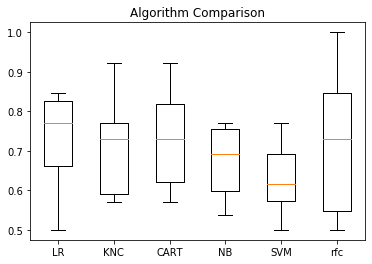

In [106]:

# Test Options and Evaluation Metrics
num_folds = 10
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('rfc', RandomForestClassifier(random_state=1111)))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=num_folds, random_state=42)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
    print(msg)
    # Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [93]:
rfc=RandomForestClassifier()
print(cross_val_score(estimator=rfc, X=x_train, y=y_train, cv=5))

[0.74074074 0.81481481 0.73076923 0.80769231 0.8       ]


In [94]:
#Applying hyperparameters to tune the model
grid_param={
    'n_estimators': [10,100,500,1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [95]:
gscv= GridSearchCV(estimator=rfc,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

In [96]:
gscv.fit(x_train,y_train)
best_parameters=gscv.best_params_
print(best_parameters)

{'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 500}


In [97]:
best_score=gscv.best_score_
print(best_score)

0.8625954198473282


In [98]:
#save the model
from sklearn.externals import joblib
joblib.dump(rfc,"Project2_sonar.pkl")

['Project2_sonar.pkl']